<a href="https://colab.research.google.com/github/Miky-Bareiro/challenge1-data-science-latam/blob/main/AluraStoreLatam-final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Configuración para visualizar mejor los gráficos
plt.rcParams['figure.figsize'] = (12, 6)

In [16]:
# URLs de los datos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


In [17]:
# Cargar datos con manejo de errores
try:
    tienda1 = pd.read_csv(url1)
    tienda2 = pd.read_csv(url2)
    tienda3 = pd.read_csv(url3)
    tienda4 = pd.read_csv(url4)
    print("Datos cargados correctamente")

    # Añadir identificador de tienda
    tienda1['Tienda'] = 'Tienda 1'
    tienda2['Tienda'] = 'Tienda 2'
    tienda3['Tienda'] = 'Tienda 3'
    tienda4['Tienda'] = 'Tienda 4'

    tiendas = [tienda1, tienda2, tienda3, tienda4]
    nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

except Exception as e:
    print(f"Error al cargar los datos: {e}")
    exit()

Datos cargados correctamente


#1. Análisis de facturación




1. ANÁLISIS DE FACTURACIÓN
Facturación de Tienda 1: $3422717700.00
Facturación de Tienda 2: $3337189200.00
Facturación de Tienda 3: $3243816900.00
Facturación de Tienda 4: $3098827200.00


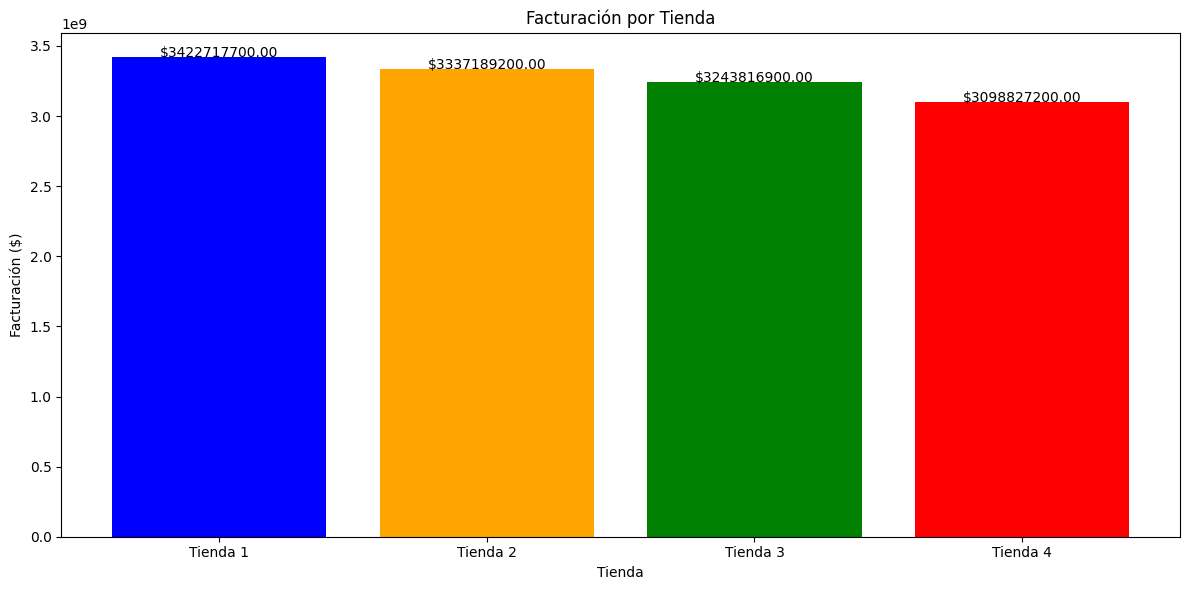

In [19]:
# 1. ANÁLISIS DE FACTURACIÓN
print("\n1. ANÁLISIS DE FACTURACIÓN")
facturacion_por_tienda = {}

try:
    for i, tienda in enumerate(tiendas):
        # Calcular facturación (precio * cantidad)
        tienda['Facturación'] = tienda['Cantidad de cuotas'] * tienda['Precio']
        facturacion = tienda['Facturación'].sum()
        facturacion_por_tienda[nombres_tiendas[i]] = facturacion
        print(f"Facturación de {nombres_tiendas[i]}: ${facturacion:.2f}")

    # Visualizar con gráfico de barras
    plt.figure()
    bars = plt.bar(facturacion_por_tienda.keys(), facturacion_por_tienda.values(), color=['blue', 'orange', 'green', 'red'])
    plt.title('Facturación por Tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Facturación ($)')

    # Añadir valores en las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 100, f"${height:.2f}", ha='center')

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error en análisis de facturación: {e}")

# 2. Ventas por categoría


2. VENTAS POR CATEGORÍA


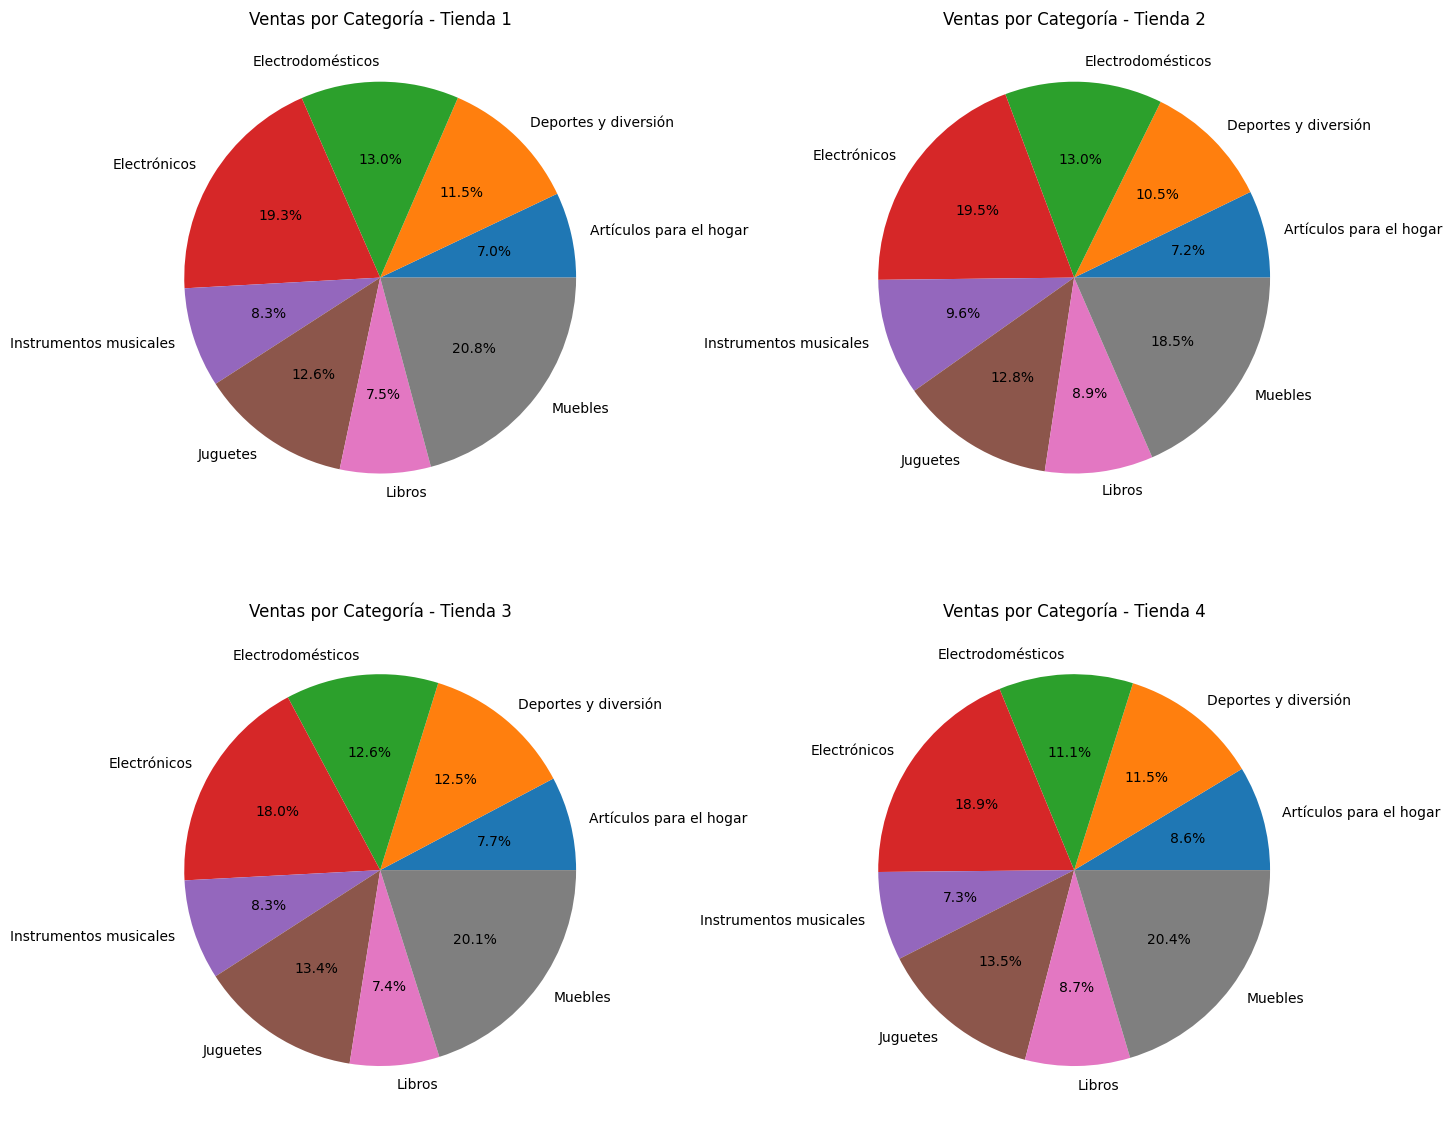

In [22]:
# 2. VENTAS POR CATEGORÍA
print("\n2. VENTAS POR CATEGORÍA")
try:
    # Combinar todos los dataframes
    df_combinado = pd.concat(tiendas)

    # Crear subplots para gráficos de torta
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()

    for i, nombre_tienda in enumerate(nombres_tiendas):
        datos_tienda = df_combinado[df_combinado['Tienda'] == nombre_tienda]
        ventas_por_categoria = datos_tienda.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()

        # Gráfico de torta para cada tienda
        ventas_por_categoria.plot.pie(autopct='%1.1f%%', ax=axes[i])
        axes[i].set_title(f'Ventas por Categoría - {nombre_tienda}')
        axes[i].set_ylabel('')

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error en análisis de ventas por categoría: {e}")

# 3. Calificación promedio de la tienda



3. CLASIFICACIÓN PROMEDIO DE LAS TIENDAS
Valoración promedio de Tienda 1: 3.98
Valoración promedio de Tienda 2: 4.04
Valoración promedio de Tienda 3: 4.05
Valoración promedio de Tienda 4: 4.00


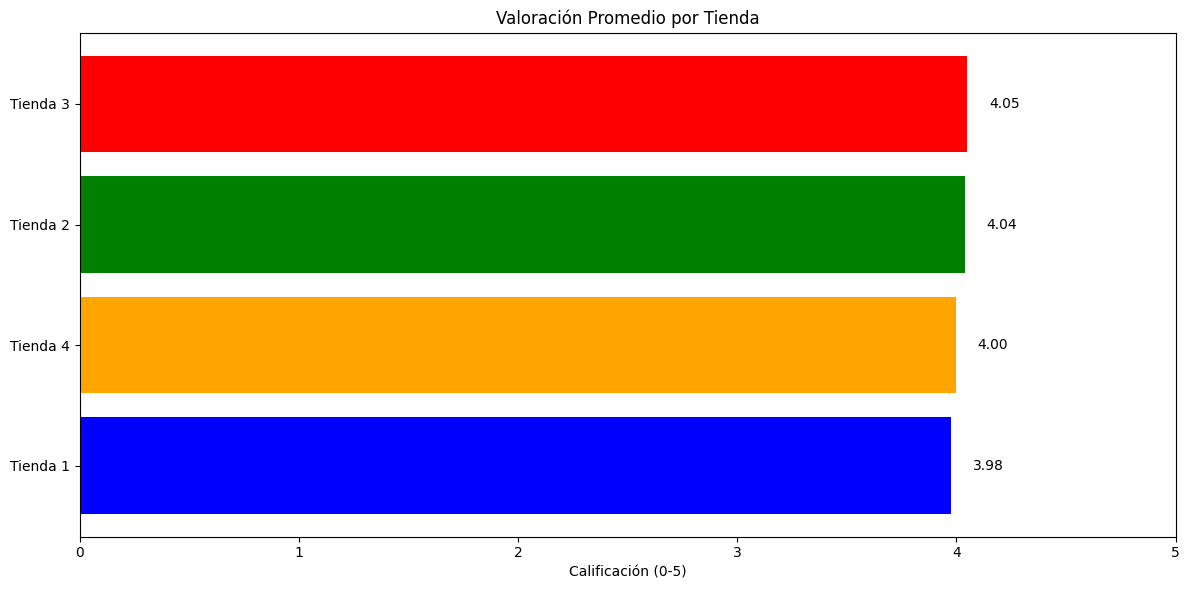

In [24]:
# 3. CLASIFICACIÓN PROMEDIO DE LAS TIENDAS
print("\n3. CLASIFICACIÓN PROMEDIO DE LAS TIENDAS")
try:
    valoraciones_promedio = {}

    for i, tienda in enumerate(tiendas):
        valoracion_promedio = tienda['Calificación'].mean()
        valoraciones_promedio[nombres_tiendas[i]] = valoracion_promedio
        print(f"Valoración promedio de {nombres_tiendas[i]}: {valoracion_promedio:.2f}")

    # Ordenar valoraciones
    valoraciones_ordenadas = {k: v for k, v in sorted(valoraciones_promedio.items(), key=lambda item: item[1])}

    # Gráfico de barras horizontales
    plt.figure()
    bars = plt.barh(list(valoraciones_ordenadas.keys()), list(valoraciones_ordenadas.values()), color=['blue', 'orange', 'green', 'red'])
    plt.title('Valoración Promedio por Tienda')
    plt.xlabel('Calificación (0-5)')
    plt.xlim(0, 5)

    # Añadir valores en las barras
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f"{width:.2f}", ha='left', va='center')

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error en análisis de valoraciones: {e}")

# 4. Productos más y menos vendidos


4. PRODUCTOS MÁS Y MENOS VENDIDOS
Productos más vendidos por tienda:
     Tienda                 Producto  Cantidad de cuotas
0  Tienda 1                   Sillón                  24
1  Tienda 2            Kit de bancas                  24
2  Tienda 3              Auriculares                  24
3  Tienda 4  Dashboards con Power BI                  18

Productos menos vendidos por tienda:
     Tienda      Producto  Cantidad de cuotas
0  Tienda 1     Cama king                   1
1  Tienda 2   Muñeca bebé                   1
2  Tienda 3   Auriculares                   1
3  Tienda 4  Celular ABXY                   1


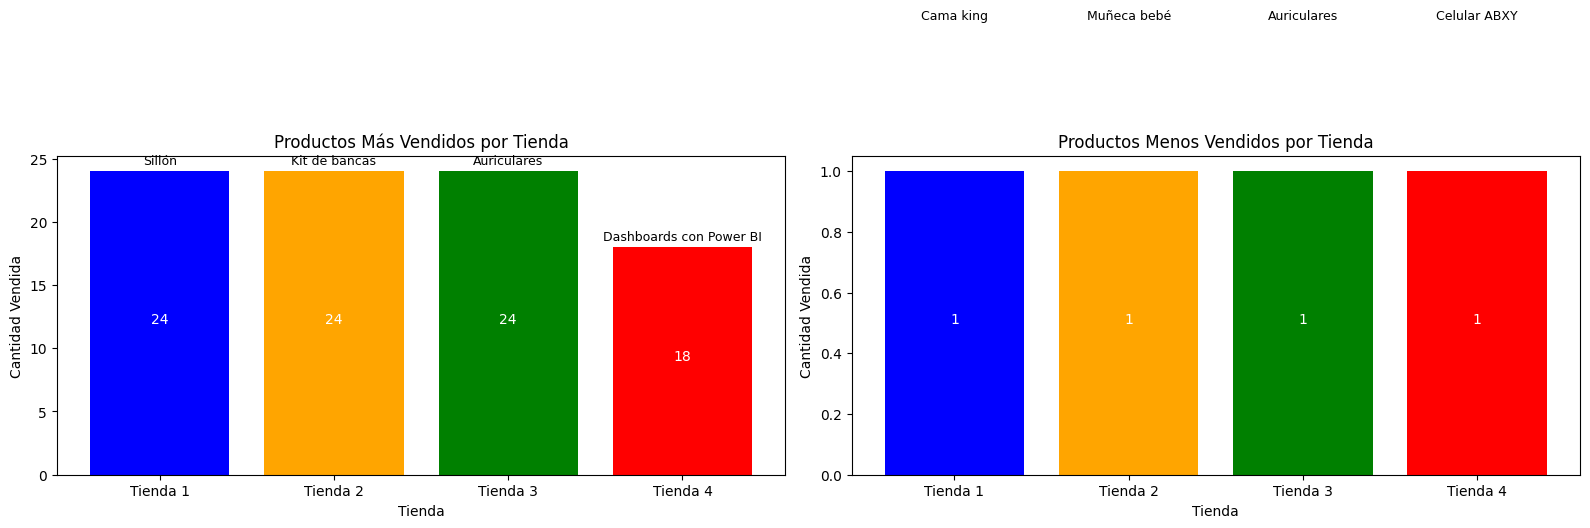

In [26]:
# 4. PRODUCTOS MÁS Y MENOS VENDIDOS
print("\n4. PRODUCTOS MÁS Y MENOS VENDIDOS")
try:
    productos_mas_vendidos = []
    productos_menos_vendidos = []

    for i, tienda in enumerate(tiendas):
        # Ordenar por cantidad vendida
        ventas_ordenadas = tienda.sort_values('Cantidad de cuotas', ascending=False)

        # Producto más vendido
        mas_vendido = ventas_ordenadas.iloc[0]
        productos_mas_vendidos.append({
            'Tienda': nombres_tiendas[i],
            'Producto': mas_vendido['Producto'],
            'Cantidad de cuotas': mas_vendido['Cantidad de cuotas']
        })

        # Producto menos vendido
        menos_vendido = ventas_ordenadas.iloc[-1]
        productos_menos_vendidos.append({
            'Tienda': nombres_tiendas[i],
            'Producto': menos_vendido['Producto'],
            'Cantidad de cuotas': menos_vendido['Cantidad de cuotas']
        })

    # Crear DataFrames
    df_mas_vendidos = pd.DataFrame(productos_mas_vendidos)
    df_menos_vendidos = pd.DataFrame(productos_menos_vendidos)

    print("Productos más vendidos por tienda:")
    print(df_mas_vendidos)
    print("\nProductos menos vendidos por tienda:")
    print(df_menos_vendidos)

    # Visualizar resultados en dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Productos más vendidos
    bars1 = ax1.bar(df_mas_vendidos['Tienda'], df_mas_vendidos['Cantidad de cuotas'], color=['blue', 'orange', 'green', 'red'])
    ax1.set_title('Productos Más Vendidos por Tienda')
    ax1.set_xlabel('Tienda')
    ax1.set_ylabel('Cantidad Vendida')

    # Añadir nombre del producto y cantidad
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 df_mas_vendidos['Producto'].iloc[i], ha='center', rotation=0, fontsize=9)
        ax1.text(bar.get_x() + bar.get_width()/2., height/2,
                 str(int(height)), ha='center', color='white')

    # Productos menos vendidos
    bars2 = ax2.bar(df_menos_vendidos['Tienda'], df_menos_vendidos['Cantidad de cuotas'], color=['blue', 'orange', 'green', 'red'])
    ax2.set_title('Productos Menos Vendidos por Tienda')
    ax2.set_xlabel('Tienda')
    ax2.set_ylabel('Cantidad Vendida')

    # Añadir nombre del producto y cantidad
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 df_menos_vendidos['Producto'].iloc[i], ha='center', rotation=0, fontsize=9)
        ax2.text(bar.get_x() + bar.get_width()/2., height/2,
                 str(int(height)), ha='center', color='white')

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error en análisis de productos: {e}")

# 5. Envío promedio por tienda


5. PROMEDIO DE COSTO DE ENVÍO DE CADA TIENDA
Costo promedio de envío de Tienda 1: $26018.61
Costo promedio de envío de Tienda 2: $25216.24
Costo promedio de envío de Tienda 3: $24805.68
Costo promedio de envío de Tienda 4: $23459.46


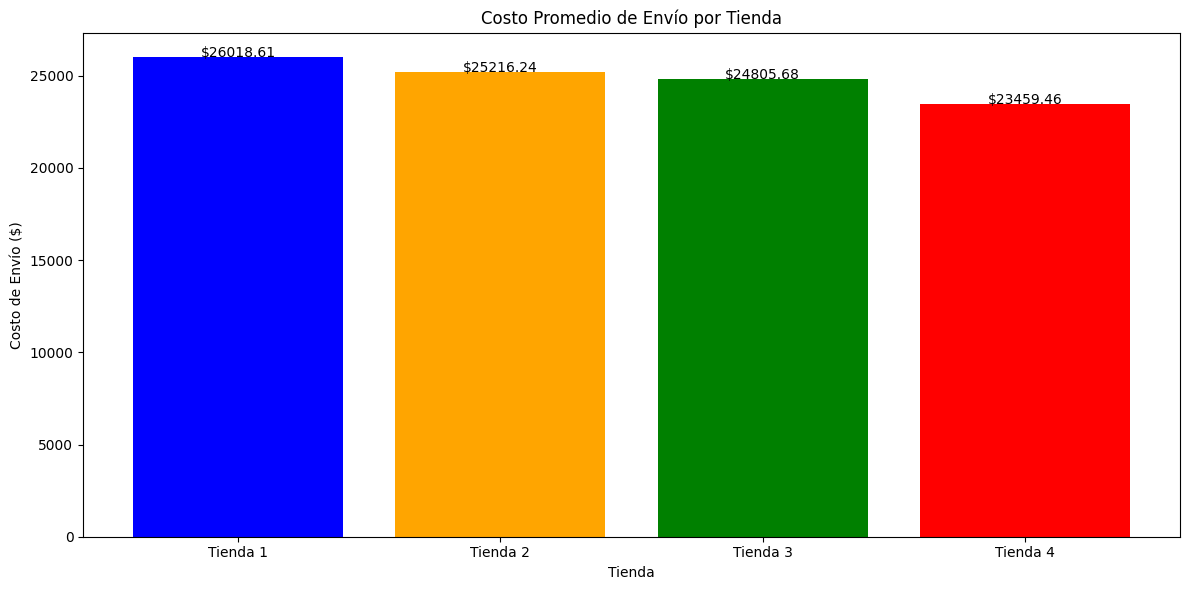

In [28]:
# 5. PROMEDIO DE COSTO DE ENVÍO DE CADA TIENDA
print("\n5. PROMEDIO DE COSTO DE ENVÍO DE CADA TIENDA")
try:
    # Verificar primero si existe la columna 'Costo de envío'
    columna_costo = None
    posibles_columnas = ['Costo de envío', 'Costo envío', 'Costo_envio', 'CostoEnvio']

    for tienda in tiendas:
        for col in posibles_columnas:
            if col in tienda.columns:
                columna_costo = col
                break
        if columna_costo:
            break

    # Si no se encuentra una columna de costo específica, calcularla basado en tiempo de envío
    if not columna_costo and 'Tiempo de envío (días)' in tiendas[0].columns:
        print("No se encontró una columna específica de costo de envío. Calculando costo basado en tiempo de envío...")
        # Asumimos que el costo es proporcional al tiempo (factor de 5 por día)
        for tienda in tiendas:
            tienda['Costo de envío'] = tienda['Tiempo de envío (días)'] * 5
        columna_costo = 'Costo de envío'

    if not columna_costo:
        raise Exception("No se pudo determinar el costo de envío para el análisis")

    costos_promedio = {}

    for i, tienda in enumerate(tiendas):
        costo_promedio = tienda[columna_costo].mean()
        costos_promedio[nombres_tiendas[i]] = costo_promedio
        print(f"Costo promedio de envío de {nombres_tiendas[i]}: ${costo_promedio:.2f}")

    # Visualizar costos promedio
    plt.figure()
    bars = plt.bar(list(costos_promedio.keys()), list(costos_promedio.values()), color=['blue', 'orange', 'green', 'red'])
    plt.title('Costo Promedio de Envío por Tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Costo de Envío ($)')

    # Añadir valores en las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.2, f"${height:.2f}", ha='center')

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error en análisis de costos de envío: {e}")

# 6. Informe y Recomendación Final


6. INFORME Y RECOMENDACIÓN FINAL
Resumen de métricas por tienda:
     Tienda   Facturación  Calificación  Costo de Envío
0  Tienda 1  3.422718e+09      3.976685    26018.609580
1  Tienda 2  3.337189e+09      4.037304    25216.235693
2  Tienda 3  3.243817e+09      4.048326    24805.680373
3  Tienda 4  3.098827e+09      3.995759    23459.457167

RECOMENDACIÓN FINAL:
Recomendamos al Sr. Juan vender la Tienda 4 por las siguientes razones:
- Tiene la menor facturación ($3098827200.00)


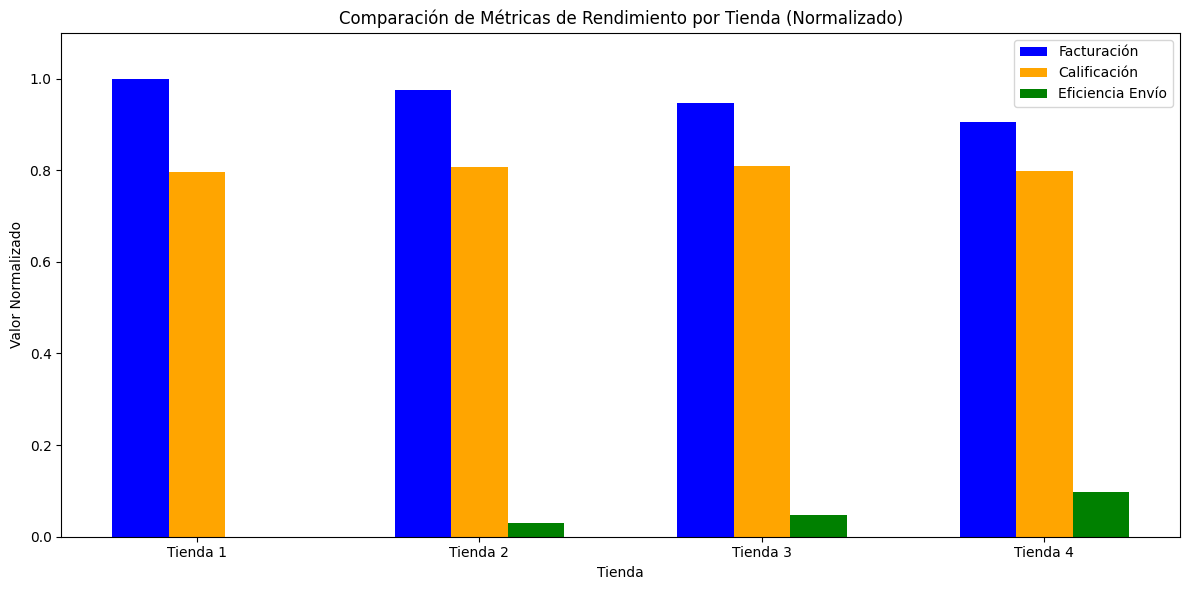


Estimado Sr. Juan,
Basado en nuestro análisis de los datos de las cuatro tiendas de Alura Store, recomendamos la venta de la Tienda 4.
Esta tienda tiene el peor desempeño en términos de facturación ($3098827200.00)
Vender esta tienda le permitirá concentrar sus recursos en las ubicaciones más rentables y eficientes para su nuevo emprendimiento.
Atentamente,
Equipo de Análisis de Datos
Lider del Equipo: Alumno Miguel Bareiro



In [32]:
# 6. INFORME Y RECOMENDACIÓN FINAL
print("\n6. INFORME Y RECOMENDACIÓN FINAL")
try:
    # Crear DataFrame con métricas clave
    metricas = pd.DataFrame({
        'Tienda': nombres_tiendas,
        'Facturación': [facturacion_por_tienda.get(t, 0) for t in nombres_tiendas],
        'Calificación': [tiendas[i]['Calificación'].mean() for i in range(len(tiendas))],
        'Costo de Envío': [tiendas[i][columna_costo].mean() for i in range(len(tiendas))]
    })

    print("Resumen de métricas por tienda:")
    print(metricas)

    # Encontrar tienda con menor facturación
    tienda_menor_facturacion = metricas.loc[metricas['Facturación'].idxmin()]
    tienda_recomendada = tienda_menor_facturacion['Tienda']

    # Verificar si también tiene peores métricas en otros aspectos
    razones = [f"Tiene la menor facturación (${tienda_menor_facturacion['Facturación']:.2f})"]

    if tienda_menor_facturacion['Tienda'] == metricas.loc[metricas['Calificación'].idxmin(), 'Tienda']:
        razones.append(f"Tiene la peor valoración promedio ({tienda_menor_facturacion['Calificación']:.2f})")

    if tienda_menor_facturacion['Tienda'] == metricas.loc[metricas['Costo de Envío'].idxmax(), 'Tienda']:
        razones.append(f"Tiene el costo de envío más alto (${tienda_menor_facturacion['Costo de Envío']:.2f})")

    # Mostrar recomendación
    print("\nRECOMENDACIÓN FINAL:")
    print(f"Recomendamos al Sr. Juan vender la {tienda_recomendada} por las siguientes razones:")
    for razon in razones:
        print(f"- {razon}")

    # Visualizar métricas en gráfico comparativo
    # Normalizamos los datos para mejor comparación
    metricas_norm = metricas.copy()
    metricas_norm['Facturación'] = metricas['Facturación'] / metricas['Facturación'].max()
    metricas_norm['Calificación'] = metricas['Calificación'] / 5  # Escala 0-5
    metricas_norm['Eficiencia Envío'] = 1 - (metricas['Costo de Envío'] / metricas['Costo de Envío'].max())  # Invertir para que menor sea mejor

    # Gráfico de barras agrupadas para comparar las métricas
    width = 0.2
    x = range(len(nombres_tiendas))

    plt.figure(figsize=(12, 6))
    plt.bar([i - width for i in x], metricas_norm['Facturación'], width, label='Facturación', color='blue')
    plt.bar([i for i in x], metricas_norm['Calificación'], width, label='Calificación', color='orange')
    plt.bar([i + width for i in x], metricas_norm['Eficiencia Envío'], width, label='Eficiencia Envío', color='green')

    plt.title('Comparación de Métricas de Rendimiento por Tienda (Normalizado)')
    plt.xlabel('Tienda')
    plt.ylabel('Valor Normalizado')
    plt.xticks(x, nombres_tiendas)
    plt.ylim(0, 1.1)
    plt.legend()
    plt.tight_layout()
    plt.show()

     # Mensaje final para el Sr. Juan
    print("\nEstimado Sr. Juan,")
    print(f"Basado en nuestro análisis de los datos de las cuatro tiendas de Alura Store, recomendamos la venta de la {tienda_recomendada}.")
    print(f"Esta tienda tiene el peor desempeño en términos de facturación (${tienda_menor_facturacion['Facturación']:.2f})")
    for i in range(1, len(razones)):
        print(f"Además, {razones[i].lower()}")
    print("Vender esta tienda le permitirá concentrar sus recursos en las ubicaciones más rentables y eficientes para su nuevo emprendimiento.")
    print(f"""Atentamente,
Equipo de Análisis de Datos
Lider del Equipo: Alumno Miguel Bareiro
""")

except Exception as e:
    print(f"Error en generación de informe final: {e}")